## Get Tweets

In [1]:
from twitterscraper import query_tweets
from datetime import timedelta, date
import pandas as pd
import csv
%matplotlib inline

Error occurred during loading data. Trying to use cache server https://fake-useragent.herokuapp.com/browsers/0.1.8
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/fake_useragent/utils.py", line 166, in load
    verify_ssl=verify_ssl,
  File "/anaconda3/lib/python3.6/site-packages/fake_useragent/utils.py", line 144, in get_browser_versions
    'No browsers version found for {browser}'.format(browser=browser))
fake_useragent.errors.FakeUserAgentError: No browsers version found for Edge/IE


In [2]:
def twitter_query(query, start_date, end_date,limit_per_day=60):
    
    query = query_tweets(query=query, 
                     limit=limit_per_day, 
                     begindate=start_date, 
                     enddate=end_date, 
                     poolsize=20, 
                     lang='en')
    
    return query

In [3]:
def create_list(query):    
    tweets = []
    for tweet in query:
        tweets.append({'date': tweet.timestamp, 'text': tweet.text, 
                   'fullname': tweet.fullname, 'id': tweet.id, 
                   'likes': tweet.likes, 'replies': tweet.replies,
                   'retweets': tweet.retweets, 'url': tweet.url,
                   'user': tweet.user})
    
    return tweets

In [4]:
def add_to_list(query):
    for tweet in query:
        tweets.append({'date': tweet.timestamp, 'text': tweet.text, 
                   'fullname': tweet.fullname, 'id': tweet.id, 
                   'likes': tweet.likes, 'replies': tweet.replies,
                   'retweets': tweet.retweets, 'url': tweet.url,
                   'user': tweet.user})
    
    return tweets

### Query

In [19]:
query = '2a'
start_date = date(2018, 1, 1)
end_date = date(2018, 3, 6)
filename = 'scrape_2a_0117_0318'

query = twitter_query(query, start_date, end_date)

In [20]:
#tweets = create_list(query)

In [21]:
if len(tweets) > 0:
    tweets = add_to_list(query)

## Pre-process Tweets

In [22]:
def pre_process(tweets):
    df = pd.DataFrame(tweets)
    print("Initial dataframe length: ", len(df))
    
    # add timestamp column
    df['month'] = df['date'].apply(lambda x : date(x.year, x.month, 1))
    
    # drop NAs
    df = df.dropna()
    # drop duplicates
    df = df.drop_duplicates()
    
    df['text'] = df['text'].apply(str)
    
    print("# of Unique ID's: ", len(df.id.unique()))
    print("Final dataframe length: ", len(df.id.unique()))
    return df

In [23]:
df = pre_process(tweets)

Initial dataframe length:  1116
# of Unique ID's:  857
Final dataframe length:  857


In [24]:
# drop values outside of queried range
#df = df[df['date'] >= start_date]
#df = df[df['date'] <= end_date]

In [24]:
len(df.id)

857

### Check that tweets look normal, ready for export

In [25]:
df.sort_values('date').head(3)

,date,fullname,id,likes,replies,retweets,text,url,user,month
25,2018-01-04 23:45:07,Patrick Henry,949064176873476097,0,0,0,Differences Between Glock 20 and Glock 17  #2...,/PatrickHenryC/status/949064176873476097,PatrickHenryC,2018-01-01
24,2018-01-04 23:46:30,Inceptor Ammunition,949064524824481792,3,0,0,This is what freedom looks like. #inceptoramm...,/INCEPTORAMMO/status/949064524824481792,INCEPTORAMMO,2018-01-01
23,2018-01-04 23:47:29,Frank Flag,949064773982814209,0,0,0,"We See That We, The People & The Country Are W...",/rightlyaligned/status/949064773982814209,rightlyaligned,2018-01-01


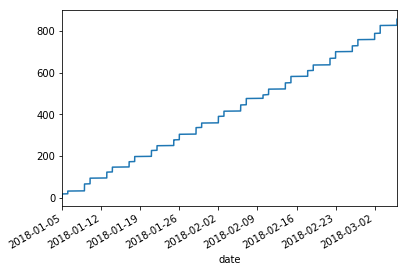

In [26]:
df.groupby('date')['text'].count().cumsum().plot()

In [27]:
df.to_csv('twitter_data/ian_scraped_tweets/'+filename)